Task 1b : (1) Visualization of Data

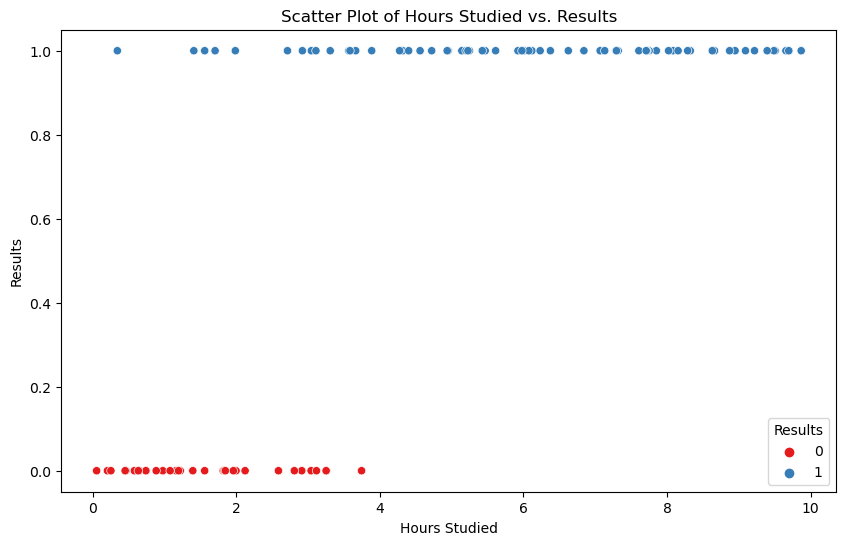

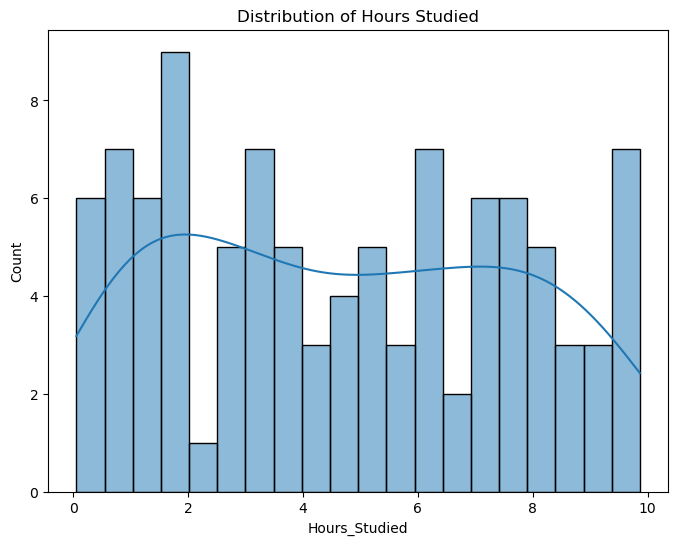

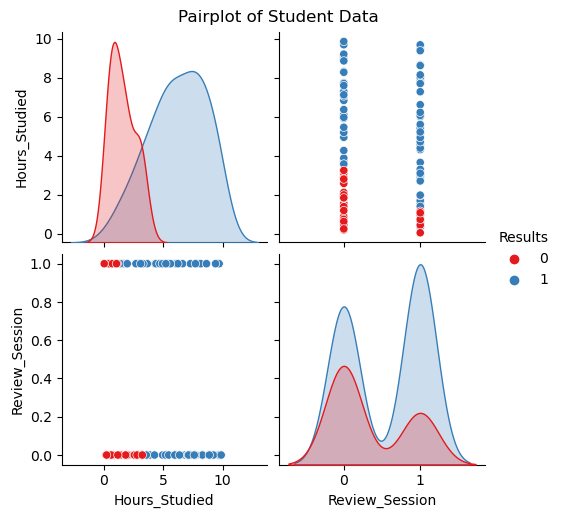

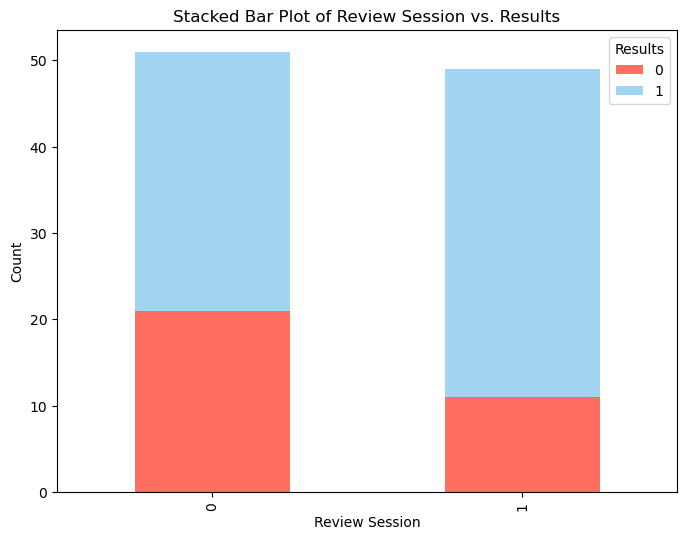

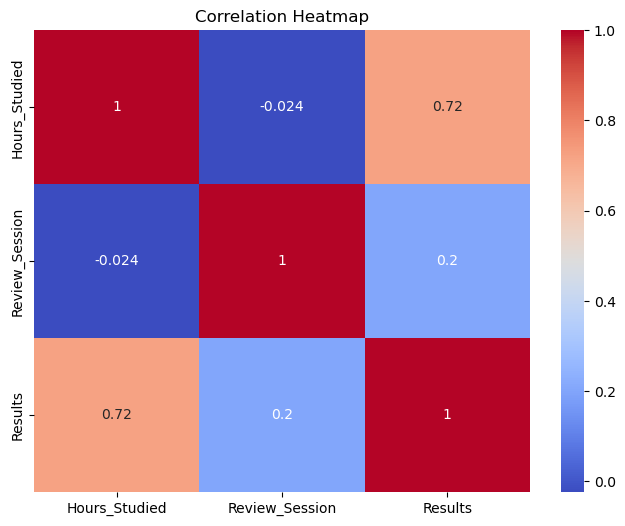

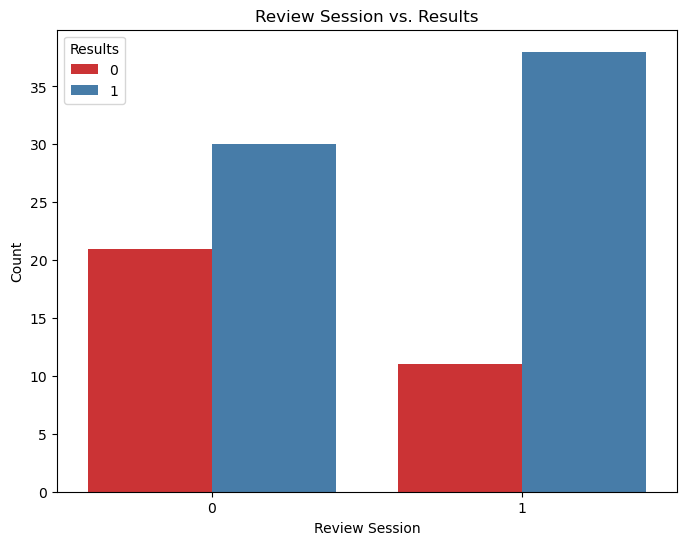

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
data = pd.read_csv('./student_data.csv')

# Scatter plot of Hours Studied vs. Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Results', data=data, hue='Results', palette='Set1')
plt.title('Scatter Plot of Hours Studied vs. Results')
plt.xlabel('Hours Studied')
plt.ylabel('Results')
plt.show()

# Create a histogram of Hours_Studied
plt.figure(figsize=(8, 6))
sns.histplot(data["Hours_Studied"], kde=True, bins=20)
plt.title("Distribution of Hours Studied")
plt.show()

# Pairplot for an overview of relationships between variables
sns.pairplot(data, hue='Results', palette='Set1')
plt.suptitle('Pairplot of Student Data', y=1.02)
plt.show()

# Stacked bar plot for Review Session and Results
cross_tab = pd.crosstab(data['Review_Session'], data['Results'])
cross_tab.plot(kind='bar', stacked=True, color=['#FF6F61', '#A2D5F2'], figsize=(8, 6))
plt.title('Stacked Bar Plot of Review Session vs. Results')
plt.xlabel('Review Session')
plt.ylabel('Count')
plt.legend(title='Results')
plt.show()

# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Bar plot for the Review Session and Results
plt.figure(figsize=(8, 6))
sns.countplot(x='Review_Session', data=data, hue='Results', palette='Set1')
plt.title('Review Session vs. Results')
plt.xlabel('Review Session')
plt.ylabel('Count')
plt.show()


Task 1b : (2) Fitting a model using Logistic Regression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file
data = pd.read_csv('student_data.csv')

# Define the features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the model's accuracy and evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.85

Confusion Matrix:
[[ 5  1]
 [ 2 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



Task 1b : (3) Displaying the results : Coefficients, Accuracy, AUC score and ROC Curve

Model Coefficients:
Intercept: -4.5814
Hours_Studied: 1.4037
Review_Session: 1.4285

Accuracy: 0.8500


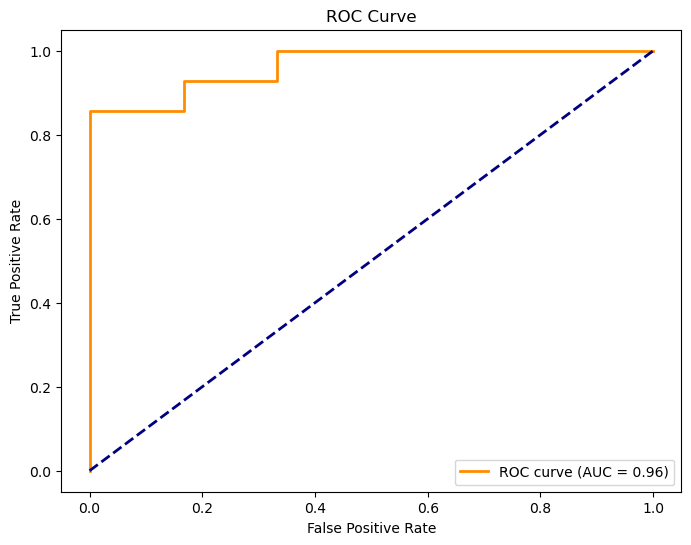

AUC: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20


Confusion Matrix:
[[ 5  1]
 [ 2 12]]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the data from the CSV file
data = pd.read_csv('student_data.csv')

# Define the features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Output model coefficients
coefficients = model.coef_
intercept = model.intercept_

print('Model Coefficients:')
print(f'Intercept: {intercept[0]:.4f}')
for i, feature in enumerate(X.columns):
    print(f'{feature}: {coefficients[0, i]:.4f}')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.4f}')

# Generate ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

print('\nConfusion Matrix:')
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


Task 2 : (1) Fitting a Support Vector Machine (SVM) model using Linear Kernel

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file
data = pd.read_csv('student_data.csv')

# Define the features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

print('\nConfusion Matrix:')
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


Accuracy: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20


Confusion Matrix:
[[ 5  1]
 [ 2 12]]


Task 2 : (2) Fitting a Support Vector Machine (SVM) model using RBF Kernel

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file
data = pd.read_csv('student_data.csv')

# Define the features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model with an RBF kernel
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

print('\nConfusion Matrix:')
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


Accuracy: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20


Confusion Matrix:
[[ 5  1]
 [ 2 12]]


Using grid search to find best gamma parameter using k-fold cross-validation.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file
data = pd.read_csv('student_data.csv')

# Define the features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for RBF
}

# Initialize the SVM model with an RBF kernel
svm = SVC(kernel='rbf')

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Use the best parameters to fit the SVM model
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report and confusion matrix
print('\nClassification Report:')
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

print('\nConfusion Matrix:')
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


Best Parameters: {'C': 1, 'gamma': 1}
Accuracy: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20


Confusion Matrix:
[[ 5  1]
 [ 2 12]]
